In [1]:
%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('..'))
from dataset.datasim import DataSimulor as ds

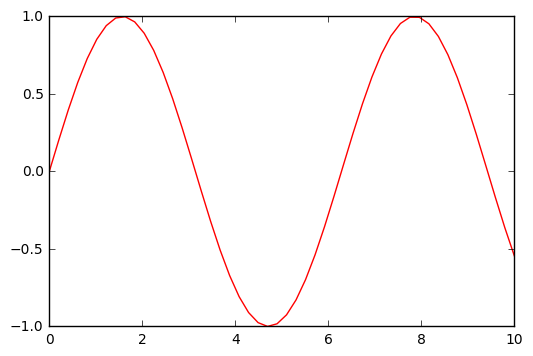

In [2]:
import math
import numpy as np
ds.draw_line(np.sin)

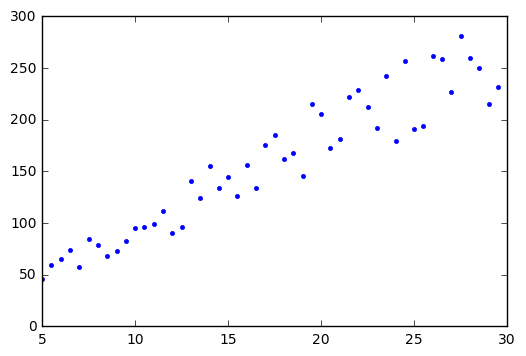

In [3]:
def f(x):
    return 9 * x + 5

(x, y) = ds.get_data(f, xmin=5, xmax=30, space=0.5, lamda=0.2)
plt.plot(x, y, '.')

### 公式解析：
- 梯度下降（GD）更新公式：
$$  \frac{\partial J(\theta)}{\partial \theta_i} = (h_\theta(x^{(i)}) - y^{(i)}) x_{j}^{(i)}$$
- 随机梯度下降（SGD）更新公式：
$$  \frac{\partial J(\theta)}{\partial \theta_i} = \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)}) x_{j}^{(i)}$$

In [4]:
def gd(theta, x, y, i, j):
    return (y[i] - np.dot(theta, x[i, :])) * x[i, j]

def sgd(theta, x, y, i, j):
    return sum([gd(theta, x, y, m, j) for m in xrange(x.shape[0])])

In [5]:
def linear_regression(x, y, dim=1, lr=0.001):
    n = x.shape[0]
    try:
        feature = x.shape[1]
    except IndexError:
        feature = 2
        
    theta = np.random.random(dim + 1)
    x = np.append(np.ones(n), x).reshape(2, n).transpose()
    
    # print theta
    step = 0
    # training
    while(True):         
        i = step % n
        last_theta = theta.copy()
        
        for j in xrange(feature):
            theta[j] += lr * sgd(theta, x, y, i, j)

        diff = theta - last_theta
        # print theta, last_theta, diff, np.dot(diff, diff)
        step += 1
        if(np.dot(diff, diff) < 0.0001 or step > 1000):
            break
            
    plt.plot(x[:, 1], y, '.')
    ds.draw_line(lambda x: theta[1] * x + theta[0],xmin=5, xmax=30)

In [6]:
(x, y) = ds.get_data(f, xmin=5, xmax=30, space=0.2, lamda=0.3)

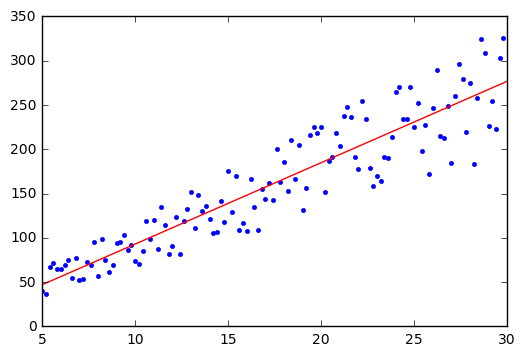

In [7]:
linear_regression(x, y, lr=0.00004)

In [9]:
import pandas as pd
from dataset.cleardata import car
data = car()
pd.DataFrame(data)

,0,1,2,3,4,5,6
0,0,0,2,2,0,3,0
1,0,0,2,2,0,2,0
2,0,0,2,2,0,1,0
3,0,0,2,2,1,3,0
4,0,0,2,2,1,2,0
5,0,0,2,2,1,1,0
6,0,0,2,2,2,3,0
7,0,0,2,2,2,2,0
8,0,0,2,2,2,1,0
9,0,0,2,4,0,3,0
